# Linear Regression | Jasamrit Rahala
---

Linear regression is a commonly used regression analysis model used by many data scientists and businesses. It is a comparitively simple model allowing for quick and easy usage. As well as this, the intuition behind the model is rather simple making it the 'hello world' for artificial intelligence and machine learning models.


## Real World Applications
---

Applications of linear regression in the real world include:

- predict sales of products based on consumer behaviour
- predict the price of houses in the coming years
- predict the performance of sports players based on their experience

Linear regression is a verstaile used by many different businesses. It is under the family of models known as generalised linear models. Below is an implementation of linear regression using the python package sklearn. In a practical scenario, one is expected to use packages inlcuding sklearn, tensorflow, numpy etc. simply because of their optimisation (threading, GPU) though the fundamental processes and concepts remain the same.


### Housing Dataset | Sklearn
---

In the example below I show how linear regression would be used in the real world, with libraries like sklearn. However in this notebook we will focus on how the model works behind the scenes. Feel free to use this as reference when making your own linear regression models. Below I import the necessary libraries to create the model.

In [1]:
import matplotlib.pylab as plt         # visualisation library
%matplotlib inline                     
import numpy as np                     # mathematics library (needed for sklearn)

from sklearn.linear_model import LinearRegression     # machine learning library (import linear regression model from here)
from sklearn import datasets                          # testing and training datasets

Above I have imported the libraries, now lets import the data. I am using data from the sklearn datasets. In particular I will be using the boston house prices dataset. This contains the prices of houses within boston given 13 other variables (which we can use to predict house prices with). Let's get a better understanding of the data below.

In [2]:
boston = datasets.load_boston()               # load data using the dataset from sklearn

print(boston.data.shape)                      # shape of the training data
print(boston.target.shape)                    # shape of the target data (in our case, house prices)
print(boston.feature_names)                   # names of the columns

# print(boston.DESCR) - uncomment this to get a full description of the data

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


If you uncomment the last line above, you will get a full explanation of the data that we are working with. The training data contains useful variables including, crime rates and pupil-teacher ratios in regions. Now we can start to prep the data for training. As you know, we have to split the data into a training set and a testing set. We do this to avoid memorization in the model. A nice way to think about this is the following example:

<blockquote>
    
If I give you a test containing ten difficult questions about calculus, you are likely to get most of them wrong. After I mark the test, I return to you the test with the correct answers. If I were to give you the same test and repeat this process. Over time you would learn the answers to the questions. This seems good however if I were to give you another test on the same topic but with slighlty different questions you are not likely to score as well as you did previously. This is because you memorized the data and didn't learn. 

Let's say instead of giving you the same test everyday I give you a different test on the same topic. You would still get low marks however over time you would take the time to learn what each question is asking and recognise patterns. It would still a take a while to learn however when you start gettin questions right, you can get them right because you understand the theory. Therefore when I give you any questions on calculus you should be able to answer them correctly.
    
</blockquote>

In [3]:
# Seperating the testing and training data using the 'train_test_split function'

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)

model = LinearRegression()        # Create a model instance
model.fit(X_train, y_train)       # Use the fit method on the model
model.score(X_test, y_test)       # Check the model's score

# from sklearn import metrics
# print(metrics.mean_squared_error(y_test, model.predict(X_test))) -- uncomment for the mse error

0.5892223849182514

Above we have split up our data using the train_test_split function. The data and target variables are specified as arguments in the function and test_size is set to 0.2. Meaning that 20% of the data will be split as testing data. The testing inputs are stored as X_test and the training inputs are stored as X_train. Whereas the testing outputs are stored as y_test and the training, stored as y_train. 

After we split the data we can create the LinearRegression() object and saved it under the model variable. We then fit the model using model.fit() method with the training inputs and outputs. Then we can test the model using the model.score() method. The numbers that are returned from the model.score() can seem rather arbitrary alone and it unclear as to what they represent. 

The model.score() gives us (by default) the R-Squared metric for analysing how well our model fits our data. 
R Squared is used a lot in investing to indicate how much variance is unexplained (not predicted by our line). 

$${R^{2} = 1 - \frac{\text{Unexplained variation}}{\text{Total variation}}}$$

We won't go over this, but you can read more about R Squared [here](https://www.investopedia.com/terms/r/r-squared.asp#:~:text=To%20calculate%20the%20total%20variance,you%20have%20the%20R%2Dsquared "R squared").

A single R Squared value by itself isn't very useful without context to other R Squared values. In our example we can see how well our model fits the data by eye. However when we deal with higher dimensions and more complex models, plotting a learning curve of R^2 values can be very useful.

COEFFICIENTS: [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]
INTERCEPT   : 38.09169492630212


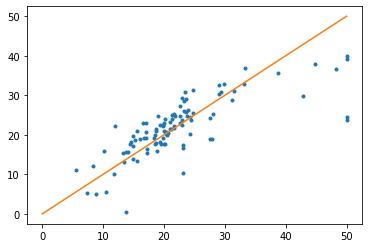

In [4]:
print(f'COEFFICIENTS: {model.coef_}')            # Get the coefficients, beta
print(f'INTERCEPT   : {model.intercept_}')       # Get the intercept, c

# plot prediction and actual data

y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plotting the line our linear regression predicted based on testing data

x = np.linspace(0, 50, 100)
y = x

plt.plot(x, y)
plt.show()

Above we can use the model to predict that testing data again. This time we can plot the predictions against the real data. As you can see the correlation between the predicted line (orange) is linked to the real data points (blue). We can also print out the co-efficients used by the model as well as the intercept. 

## Building our own Linear Regression model
---

Now that we have seen the linear regression model in action it is time to build our own and really understand what is going on behind the scenes. For example what does model.fit() and model.predict() really do? By understanding the concepts and coding along, you can more easily debug your own code as well as modify existing code. Plus there wont always be a sklearn library to help you with some languages. By having the ability to write your own model you can also implement much more easily with your own projects.


### The Data
---

For this project we will be using a dataset that I have created. The dataset contains student test scores (%) and the minutes a student has spent revising for a test. This dataset should cover the basic principles of linear regression. To import the dataset I am using a library called requests - this allows me to pull data of websites. Since I have hosted my data as a .txt on github this is useful for retrieving the data. __Do not worry if you dont understand the below, it is merely retrieving and formatting the data.__


In [ ]:
import requests
dataset = requests.get('https://raw.githubusercontent.com/JRahala/tempStorage/master/StudentData.txt').text.replace('\r','')

dataset = dataset.split('\n')[1:-1]

scores = []
minutes = []

for datapoint in dataset:
    
    (score, minute) = datapoint.split(',')
    
    scores.append(float(score))
    minutes.append(float(minute))
    
print(scores[:5], minutes[:5])
plt.scatter(minutes, scores, s = 1)

Above you can see the first five samples of data and a plot of the data. I have made the correlation easy to see for teaching reasons. This way you will be able to tell if your model works. The data above contains no missing values and has been turned into float values so they can be used in calculations. But before we can start to use the data to train a model. We need to split the data into testing and training data. Please complete the function below.

In [ ]:
def split_test_train(inputs, outputs, test = 0.2):
    
    train_samples = len(dataset)
    
    # split the data here
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_test_train(minutes, scores)

This is all the data processing that needs to be done for this dataset. Now lets move onto creating the linear regression class.


### Linear Regression Class
---

The linear regression class will first of all need an \__init\__() function. This will construct our class. Inside this function we can define how many dimensions our model will work for. Dimensions refers to the number of features in our input data. For example we are going to be predicting scores given minutes. We are only using minutes as our input, this is one feature. Therefore our model will be one-dimensional.

We will also need a predict method which will take in an array of inputs and multiply them by the respective weights.

Below I have created a skeleton for the linear regression class. Please fill in the remaining code where commented.

In [ ]:

import random  # allows us to randomise the model parameters


class LinearRegression:
    
    def __init__(self, dimensions):
        
        self.dimensions = dimensions
        self.weights = [random.random() for weight in range(self.dimensions + 1)]
        
        # I have added 1 to the dimensions since we have to account for a constant term (bias)
        # In terms of lines this will be the +c part of y = mx + c
        
        # Our weights array is essentially = [m, c]
        
    def predict(self, inputs):
        
        # write code here - the predict method should take an array of inputs and return an output based on that array
        output = 0
        
        return output


After filling in the above we have our basic linear regression model, however it isn't very smart. Let's create a cost function to see how well / badly it performs given our data. Please fill in the code where commented

In [ ]:
def cost(self, inputs, outputs):
    
    # inputs represents the array of minutes in our case
    # outputs represents the array of scores in our case
    
    # use the self.predict method to form a prediction and calculate the sum of squared errors based on the real values
    # optionally you can take the mean of this sum
    
    error = 0
    for index in range(len(inputs)):
        
        error += 0 # write code that uses the adds the squared difference to the total error
        
    return error
    
    
# add this method to the linear regression class
LinearRegression.cost = cost

Now we are ready to create a linear regression instance / object. I have created a LinearRegression() object below. I have also added a visualisation function that will help visualise our model's predictions using matplotlib (a graphing libarary) against real data.

In [ ]:
import matplotlib.pyplot as plt # this will allow us to visualise graphs and charts

def plot(self, inputs, outputs):
            
    # scatter plot our training data
    
    for i in range(len(inputs)):
        plt.scatter(inputs[i], outputs[i], c = 'red')

    # we are plotting from y = 0 to y = 100; we can rearrange our equation and solve for x to plot the datapoints; y - c / m = x
    
    plt.plot([-self.weights[1] / self.weights[0],100-self.weights[1] / self.weights[0]] ,[0, 100], c = 'black')    
    plt.show()


# add this method to the linear regression class
LinearRegression.plot = plot
    
myModel = LinearRegression(1) # create the linear regression object
myModel.plot(X_train, y_train) # plot the training inputs and outputs

print('model fit:', myModel.cost(X_train, y_train)) # print how well our model fits the data

If you have got the plotting to work, then you should see a black line indicating our prediction line and red dots, indicating real datapoints. Before we move on to actually training the model, have a play around with some of the weights for our model and try to understand how adjusting the weights of our model can change how well the model fits the data.

### Training
---

Now that we have a basic model that can predict data, lets fine tune the model so that its predictions are more useful.

### Training | Brute force approach

The easiest way to compute the best weights for our model is by brute forcing them. We can exhaust the values that the weights for our model could be by testing the cost for each pairing of weights. Below is a loop that I have set up which plots the cost of each set of weights.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

costMap = []

for m in range(-100, 100):
    
    row = []
    
    for c in range(-100, 100):
        
        myModel.weights = [m, c]
        row.append(-1 * myModel.cost(X_train, y_train))
        
    costMap.append(row)
    
plt.imshow(costMap, cmap='hot')

plt.axis('off')

plt.show()

Above the code you should see a heat map of cost values. The Y axis represents different values of M and the X axis represents the C values. There should be a highlighted spot in the plot above. This spot shows the lowest cost. I.e. the best values for m and c for our line. Whilst this is useful and true, the process can be computationally expensive (we are computing 200 x 200 operations). As well as this the results are not very precise. We only get integer accuracy.

*You might notice the x -1 infront of the cost output, this is purely for aesthetics when plotting on the map

Lets try to solve the problem of finding M and C (the weights of our model) using calculus)

### Training | Calculus
---

Lets take another look at the problem. We can produce a 3D plot based on the costs given m and c. The plot will look like below. You can have a go at plotting your own curve based on this 3D Plotting documentation https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html, if you want.

![Image](https://raw.githubusercontent.com/JRahala/tempStorage/master/Curve.png)

Mathematically this curve should be convex. For us that means there is one minimum point on the curve. This would mean there exists one minimum point for cost (point B). One configuration of m and c with the lowest cost. This also means that at any point on the curve there exists a gradient that will point towards / away from the minimum. By figuring out the gradient at a given point on the curve (for example point A) we can move towards the minimum point. Remember our point on the curve will be defined by our current weights (m and c). So how can we go about finding the gradient and using this to change our weights.

### Training | Calculus Intuition
---

This article / video should give you the a helping hand with some of the calculus needed for linear regression.
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

If you do need more help with the calculus do feel free to contact me via discord.
Please refer to the video to understand the rules below.

### Training | Update Rules
---

To update the weights for our linear regression line, weights[0] (m) and weights[1] (c), we use the rules below.

<br>

$$ \Delta W_{0} -= \frac{\partial J}{\partial W_{0}} $$
$$ \Delta W_{1} -= \frac{\partial J}{\partial W_{1}} $$

where

$$ \frac{\partial J}{\partial W_{0}} = 2x \cdot \sum_{i}^{n}(f(x) - y_{i}) $$
$$ \frac{\partial J}{\partial W_{1}} = 2 \cdot \sum_{i}^{n}(f(x) - y_{i}) $$

<br>

Have a go at implementing this update rule in your linear regression model. Remember $ f(x) $ represents our model's guess and $ y_{i} $ is the actual datapoint.


In [ ]:
def train(self, inputs, outputs):
    
    for i in range(len(inputs)):
        
        current_input = inputs[i]
        current_output = outputs[i]
        
        error = # what would this be?
        
        self.weights[0] -= 2 * inputs[i] * error
        self.weights[1] -= 2 * error    
        
LinearRegression.train = train # add this method to our class

This really concludes the training stage of linear regression. You can experiment by analysing this model. Try looping the train function and measure the cost over time. Perhaps plotting the model.

In [ ]:
myModel = LinearRegression(1) # create the linear regression object
myModel.train(X_train, y_train) # try and make this function work

# try looping over the train function and plotting the model at different stages during training.

## Evaluation
---

Now that we have successfully built our linear regression model, lets try some variations. The first thing we can do is test the model on the training data we seperated at the start. Try doing this in the below cell.

In [ ]:
# all down to you now!

As well as this, we can try changing what is known as the learning rate of the training function. The learning rate has been discussed in the video and tells us how much effect each training step should have. Below is a visualisation of the effect of learning rates.

![Image](https://raw.githubusercontent.com/JRahala/tempStorage/master/learning_rates.png)

Try to redefine the train function with a learning rate and experiment with different learning rates. Analyse the cost over time.

In [ ]:
def lr_train(self, inputs, outputs, lr = 0.5): # set the default learning rate to 0.5
    
    for i in range(len(inputs)):
        
        current_input = inputs[i]
        current_output = outputs[i]
        
        error = # what would this be?
        # how can you add the learning_Rate into the equation?
        
        self.weights[0] -= 2 * inputs[i] * error
        self.weights[1] -= 2 * error    
        
LinearRegression.lr_train = lr_train # add this method to our class
myModel = LinearRegression(1)

# try and use the lr_train function with a learning rate - see what happens when you change lr

There are many other things you can achieve with linear regression and many other analyitical methods to see your models fit and how we can optimise this method. Using some more calculus, there are more advanced methods to train the model.

I have added some links below for further reading and if you have any questions (either because you are stuck or want more, do feel free to contact me on discord (JAM) and check out github JRahala for more projects).

- https://365datascience.com/sum-squares/
- https://www.youtube.com/watch?v=nk2CQITm_eo
- https://www.youtube.com/watch?v=PaFPbb66DxQ
- https://www.youtube.com/watch?v=sDv4f4s2SB8

Thanks,
Jam